# Book Recommender System (Due Date : 23/2/24)

- Build a recommender system that will recommend a book to user based on user ID

# Imports 

- Import necessary libraries for data manipulation and visualization.

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import nltk

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

# Load Dataset

- Load the book dataset from the CSV file.
- hint : use encoding = 'ISO-8859-1'

In [3]:
# Load the dataset

data = pd.read_csv('Book_Dataset.csv', encoding='ISO-8859-1')

In [4]:
data.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [5]:
data.fillna(0, inplace=True)
print(data)

      Unnamed: 0  User.ID                                         Book.Title  \
0              1   276726                                Classical Mythology   
1              2   276729                                       Clara Callan   
2              3   276729                               Decision in Normandy   
3              4   276736  Flu: The Story of the Great Influenza Pandemic...   
4              5   276737                             The Mummies of Urumchi   
...          ...      ...                                                ...   
9995        9996   162121       American Fried: Adventures of a Happy Eater.   
9996        9997   162121                              Cannibal In Manhattan   
9997        9998   162121                    How to Flirt: A Practical Guide   
9998        9999   162121                                           Twilight   
9999       10000   162129                       Kids Say the Darndest Things   

      Book.Rating  
0               5  

# Sort Data

- Sort the dataset by User IDs for consistency.

In [6]:
# Sort the dataset by User IDs

data = pd.DataFrame(data)
sorted_data = data.sort_values(by='User.ID')
print(sorted_data)

      Unnamed: 0  User.ID                                         Book.Title  \
2401        2402        8                                              Wings   
2400        2401        8  The Western way: A practical guide to the West...   
2399        2400        8                            Ancient Celtic Romances   
2402        2403        8                                           Truckers   
2405        2406        8                                  The Art Of Celtia   
...          ...      ...                                                ...   
2395        2396   278854      La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica)   
2398        2399   278854  Celtic Mythology (Library of the World's Myths...   
2393        2394   278854                         A corrente de Trewis Scott   
2394        2395   278854                                      As valkÃ­rias   
2397        2398   278854     A Treasury of Irish Myth, Legend, and Folklore   

      Book.Rating  
2401            5  

# Rename Columns

- Rename columns 'User.ID': 'UserId', 'Book.Title': 'Title', 'Book.Rating': 'Rating' for better readability.

In [7]:
# Rename the columns for clarity

data = data.rename(columns={'User.ID': 'UserId', 'Book.Title': 'Title', 'Book.Rating': 'Rating'})
print(data)

      Unnamed: 0  UserId                                              Title  \
0              1  276726                                Classical Mythology   
1              2  276729                                       Clara Callan   
2              3  276729                               Decision in Normandy   
3              4  276736  Flu: The Story of the Great Influenza Pandemic...   
4              5  276737                             The Mummies of Urumchi   
...          ...     ...                                                ...   
9995        9996  162121       American Fried: Adventures of a Happy Eater.   
9996        9997  162121                              Cannibal In Manhattan   
9997        9998  162121                    How to Flirt: A Practical Guide   
9998        9999  162121                                           Twilight   
9999       10000  162129                       Kids Say the Darndest Things   

      Rating  
0          5  
1          3  
2     

In [8]:
data.head()

,Unnamed: 0,UserId,Title,Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [9]:
# Number of unique User IDs, Titles, and Ratings

unique_user_ids = data['UserId'].nunique()
unique_titles = data['Title'].nunique()
unique_ratings = data['Rating'].nunique()

print("Number of unique User IDs:", unique_user_ids)
print("Number of unique Titles:", unique_titles)
print("Number of unique Ratings:", unique_ratings)

Number of unique User IDs: 2182
Number of unique Titles: 9659
Number of unique Ratings: 10


# Simple Exploratory Data Analysis (EDA)

- Analyze the distribution of ratings using visualizations.

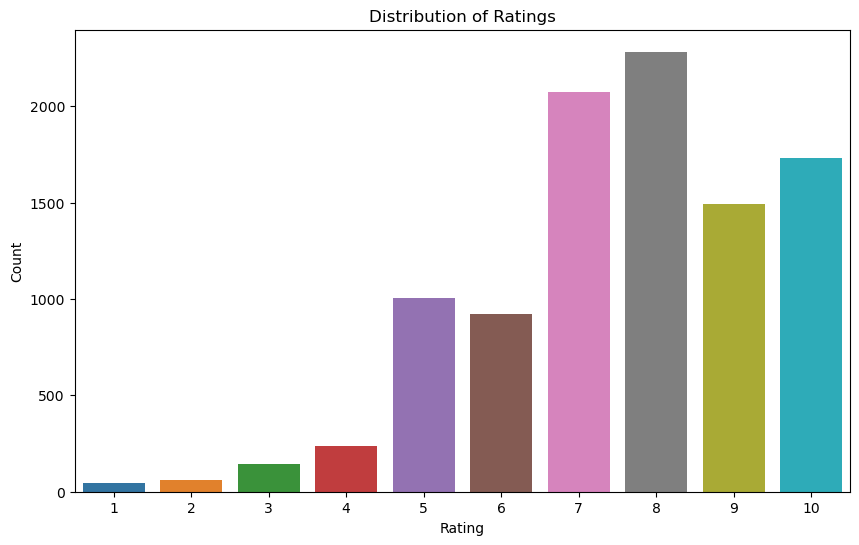

In [10]:
# Plot the distribution of ratings

plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=data)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Pivot Data

- Pivot the dataset to convert it from long format to wide format for further analysis.
- hint: use dataframe.pivot_table(include your index, column and rating).fillna(0)

In [11]:
# Convert the long format dataset to wide format using pivot table

pivot_table = data.pivot_table(index='Title', columns='UserId', values='Rating').fillna(0)
pivot_table.index

Index([' Jason, Madison &amp', ' Other Stories;Merril;1985;McClelland &amp',
       ' Repairing PC Drives &amp', ''48',
       ''O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities',
       '...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR',
       '01-01-00: A Novel of the Millennium',
       '1,401 More Things That P*Ss Me Off', '10 Commandments Of Dating',
       '100 Great Fantasy Short, Short Stories',
       ...
       'Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)',
       '\Even Monkeys Fall from Trees\ and Other Japanese Proverbs',
       '\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment',
       '\More More More,\ Said the Baby', '\O\ Is for Outlaw',
       '\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character',
       '\Well, there's your problem\: Cartoons', 'iI Paradiso Degli Orchi',
       'stardust', 'Ã?Â?bermorgen.'],
      dtype='object', name='Title', length=9659)

In [12]:
pivot_table

UserId,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
Title,,,,,,,,,,,,,,,,,,,,,
"Jason, Madison &amp",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Other Stories;Merril;1985;McClelland &amp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Repairing PC Drives &amp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\Well, there's your problem\: Cartoons",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


# Calculate Similarity

- Calculate cosine similarity between users based on their book ratings.
- hint: use 1 - pairwise_distances

In [13]:
# Calculate cosine similarity between users based on their ratings

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from ast import literal_eval

In [14]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Title'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(data.index, index=data['Title']).drop_duplicates()

In [15]:
# Store user similarity scores in a DataFrame

def get_user_recommendations(user_id, n=5):
    user_books = data[data['UserId'] == user_id]
    user_similarities = {}
    book_scores = {}

    for idx, row in user_books.iterrows():
        book_idx = indices[row['Title']]
        user_scores = list(enumerate(cosine_sim[:, book_idx]))
        user_scores = sorted(user_scores, key=lambda x: x[1], reverse=True)
        user_scores = user_scores[1:n+1]
        for i, (user_index, score) in enumerate(user_scores, 1):
            if user_index not in user_similarities:
                user_similarities[user_index] = score
            else:
                user_similarities[user_index] += score

        sim_scores = list(enumerate(cosine_sim[book_idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:n+1]

        for i, (book_index, score) in enumerate(sim_scores, 1):
            book_title = data.loc[book_index, 'Title']
            if book_title not in book_scores:
                book_scores[book_title] = score
            else:
                book_scores[book_title] += score
                
        sorted_users = sorted(user_similarities.items(), key=lambda x: x[1], reverse=True)
        user_similarity_df = pd.DataFrame(sorted_users, columns=['UserId', 'SimilarityScore'])
        sorted_books = sorted(book_scores.items(), key=lambda x: x[1], reverse=True)
        return [book[0] for book in sorted_books[:n]], user_similarity_df

# Define Recommendation Function

- Define a function to recommend books for a given user ID based on similar users' preferences.
- hint:
- def function_name(your_parameter):
-  #Find top 3 similar users based on cosine similarity
-  similar_users = user_sim_df.sort_values(by=your_parameter, ascending=False).head(3).index
-  #Get the books read by similar users
-  similar_books = book[book['UserId'].isin(similar_users)]['Title']
-  #Get recommended books by excluding books already read by the customer
-  recommended_books = set(similar_books) - set(book[book['UserId'] == your_parameter]['Title'])
-  return recommended_books

In [16]:
# Function to get book recommendations for a given user ID

def get_user_recommendations(user_id, n=5):
    user_books = data[data['UserId'] == user_id]

    book_scores = {}

    for idx, row in user_books.iterrows():
        book_idx = indices[row['Title']]

        sim_scores = list(enumerate(cosine_sim[book_idx]))

        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        sim_scores = sim_scores[1:n+1]

        for i, (book_index, score) in enumerate(sim_scores, 1):
            book_title = data.loc[book_index, 'Title']
            if book_title not in book_scores:
                book_scores[book_title] = score
            else:
                book_scores[book_title] += score

    sorted_books = sorted(book_scores.items(), key=lambda x: x[1], reverse=True)

    return [book[0] for book in sorted_books[:n]]

# User Input

- Prompt the user to input a user ID for book recommendations.

In [17]:
# Get user input for user ID

user_id = input("Enter your user ID: ")
user_id = int(user_id)
recommendations = get_user_recommendations(user_id)
print("Top 5 book recommendations for user", user_id, ":")
print(recommendations)

Enter your user ID: 278849
Top 5 book recommendations for user 278849 :
["The Kitchen God's Wife", 'Kitchen', 'The Last Good Time (Vintage Contemporaries)', 'The Hundred Brothers: A Novel (Vintage Contemporaries (Paperback))']
